## 5 Prediction of Stationary Processes

In this section, we consider predicting the value $X_{n+h}$ for $h > 0$ of a stationary time series with known mean $\mu_X$ and autocovariance function (ACVF) $\gamma_X$, in terms of the values $\{X_n, \ldots, X_1\}$. The prediction is constructed as a linear combination of $1, X_n, \ldots, X_1$ by minimizing the mean squared error (called the *optimal linear predictor*); i.e., we have the predictor as

$$
P(X_{n+h} \mid X_n, \ldots, X_1, 1) = a_0 + a_1 X_n + \cdots + a_n X_1,
$$

where $\mathbf{a} = (a_0, \ldots, a_n)^T$ minimizes

$$
S(\mathbf{a}) = \mathbb{E}\left( X_{n+h} - a_0 - a_1 X_n - \cdots - a_n X_1 \right)^2. \tag{5.1}
$$

### 5.1 Predict $X_{n+h}$ by $X_n$

We start with predicting $X_{n+h}$ by $X_n$ as

$$
P(X_{n+h} \mid X_n, 1) = a_0 + a_1 X_n.
$$

In this case, we have

$$
S(\mathbf{a}) = \mathbb{E}\left( X_{n+h} - a_0 - a_1 X_n \right)^2 
= \mathbb{E}(X_{n+h}^2 + a_0^2 + a_1^2 X_n^2 - 2 a_0 X_{n+h} - 2 a_1 X_n X_{n+h} + 2 a_0 a_1 X_n).
$$

Using stationarity, this simplifies to:

$$
S(\mathbf{a}) = a_0^2 + (a_1^2 + 1)\left( \gamma_X(0) + \mu_X^2 \right) + (2 a_0 a_1 - 2 a_0) \mu_X - 2 a_1 \left( \gamma_X(h) + \mu_X^2 \right).
$$

Taking the partial derivatives and setting them to zero:

$$
\frac{\partial S(\mathbf{a})}{\partial a_0} = 2 a_0 + 2 a_1 \mu_X - 2 \mu_X = 0,
$$

$$
\frac{\partial S(\mathbf{a})}{\partial a_1} = 2 a_0 \mu_X + 2 a_1 \left( \gamma_X(0) + \mu_X^2 \right) - 2 \left( \gamma_X(h) + \mu_X^2 \right) = 0.
$$

Solving this system gives:

$$
a_1 = \rho_X(h), \quad a_0 = \mu_X (1 - \rho_X(h)),
$$

where $\rho_X(h) = \gamma_X(h)/\gamma_X(0)$ is the autocorrelation function.

Hence,

$$
P(X_{n+h} \mid X_n, 1) = \mu_X + \rho_X(h)(X_n - \mu_X),
$$

and the mean squared error is:

$$
\mathbb{E}\left[ \left( P(X_{n+h} \mid X_n, 1) - X_{n+h} \right)^2 \right] = \gamma_X(0) \left(1 - \rho_X(h)^2\right).
$$

**Interpretation:**
- If $|\rho_X(h)| \to 1$, then $\mathbb{E}[\text{error}^2] \to 0$ (accuracy improves).
- If $\rho_X(h) = \pm 1$, the error is zero (perfect linear predictability).
- If $\rho_X(h) = 0$, then $P(X_{n+h} \mid X_n, 1) = \mu_X$, and the error is $\gamma_X(0)$ (uncorrelated).

If $\{X_t\}$ is Gaussian and stationary, then the joint distribution of $(X_n, X_{n+h})$ is:

$$
\mathcal{N} \left(
\begin{pmatrix}
\mu_X \\
\mu_X
\end{pmatrix},
\begin{pmatrix}
\gamma_X(0) & \rho_X(h) \gamma_X(0) \\
\rho_X(h) \gamma_X(0) & \gamma_X(0)
\end{pmatrix}
\right).
$$


The conditional distribution of $X_{n+h}$ given $X_n$ is

$$
\mathcal{N} \left( \mu_X + \rho_X(h)(X_n - \mu_X), \; \gamma_X(0)\left(1 - \rho_X(h)^2\right) \right).
$$

Thus,

$$
\mathbb{E}(X_{n+h} \mid X_n) = \mu_X + \rho_X(h)(X_n - \mu_X).
$$

Generally speaking, suppose we have a target variable $Y$ and a set of predictor variables $X$. The optimal (least squares) predictor of $Y$ given $X$ is $\mathbb{E}(Y \mid X)$:

$$
\min_f \mathbb{E}\left\{ (Y - f(X))^2 \right\} = \min_f \mathbb{E}\left[ \mathbb{E}\left\{ (Y - f(X))^2 \mid X \right\} \right] 
= \mathbb{E} \left[ \mathbb{E} \left\{ Y - \mathbb{E}(Y \mid X) \right\}^2 \mid X \right].
$$

Thus, the optimal predictor of $Y$ given $X$ is:

$$
\mathbb{E}(Y \mid X).
$$

- If $\{X_t\}$ is stationary, then $P(X_{n+h} \mid X_n, 1) = \mu_X + \rho_X(h)(X_n - \mu_X)$ is the **optimal linear predictor**.
- If $\{X_t\}$ is also Gaussian, then $P(X_{n+h} \mid X_n, 1) = \mu_X + \rho_X(h)(X_n - \mu_X)$ is the **optimal predictor**.
- This extends to longer histories: $\{X_n, X_{n-1}, \ldots, X_1\}$.

---

### 5.2 Predict $X_{n+h}$ by $\{X_n, \ldots, X_1, 1\}$

To find $P(X_{n+h} \mid X_n, \ldots, X_1)$, we minimize the function (5.1) to find the values of $\mathbf{a} = (a_0, a_1, \ldots, a_n)^T$.

Taking partial derivatives and setting them to zero, we obtain a system of equations:

$$
\frac{\partial S(\mathbf{a})}{\partial a_j} = 0, \quad j = 0, \ldots, n,
$$

for $j=0$:

$$
\mathbb{E} \left( X_{n+h} - a_0 - \sum_{i=1}^n a_i X_{n+1-i} \right) = 0,
$$

and for $j = 1, \ldots, n$,

$$
\mathbb{E} \left[ \left( X_{n+h} - a_0 - \sum_{i=1}^n a_i X_{n+1-i} \right) X_{n+1-j} \right] = 0.
$$

It can be shown that $\mathbf{a}_n = (a_1, \ldots, a_n)^T$ satisfies:

$$
\Gamma_n \mathbf{a}_n = \gamma_n(h), \tag{5.2}
$$

and

$$
a_0 = \mu_X \left(1 - \sum_{i=1}^n a_i \right),
$$

where

- $\Gamma_n = [\gamma_X(i - j)]_{i,j=1}^n$ is the autocovariance matrix, and
- $\gamma_n(h) = \left( \gamma_X(h), \ldots, \gamma_X(h + n - 1) \right)^T$ is the cross-covariance vector.


Hence, we have

$$
P(X_{n+h} \mid X_n, \ldots, X_1, 1) = \mu_X + \sum_{i=1}^n a_i (X_{n+1-i} - \mu_X). \tag{5.3}
$$

and

$$
\mathbb{E} \left\{ \left( P(X_{n+h} \mid X_n, \ldots, X_1, 1) - X_{n+h} \right)^2 \right\} = \gamma_X(0) - \mathbf{a}_n^T \gamma_n(h).
$$

Now, we show the uniqueness of $P(X_{n+h} \mid X_n, \ldots, X_1)$ (left as a homework problem).  
**Hint**: Suppose there are two different sets of coefficients:  
$\{a_{j1}, \; j = 0, \ldots, n\}$ and $\{a_{j2}, \; j = 0, \ldots, n\}$ such that

$$
P(X_{n+h} \mid X_n, \ldots, X_1, 1) = a_{01} + a_{11} X_n + \cdots + a_{n1} X_1 = a_{02} + a_{12} X_n + \cdots + a_{n2} X_1.
$$

Define

$$
Z = a_{01} - a_{02} + \sum_{j=1}^n (a_{j1} - a_{j2}) X_{n+1-j}.
$$

Show that $\mathbb{E}(Z^2) = 0$, which implies $Z = 0$.

---

**Proposition 5.1**  
For a stationary process, if $\gamma_X(0) > 0$ and $\gamma_X(h) \to 0$ as $h \to \infty$, then the covariance matrix

$$
\Gamma_n = [\gamma_X(i - j)]_{i,j=1}^n
$$

is positive definite for every $n$.

---

**Remark 5.1**  
When $\gamma_X(0) > 0$ and $\gamma_X(h) \to 0$ as $h \to \infty$, the uniqueness can be seen directly from **Proposition 5.1**  
i.e., in this case, $\Gamma_n = [\gamma_X(i - j)]_{i,j=1}^n$ is non-singular for every $n$, and equation (5.2) has a unique solution:

$$
\mathbf{a}_n = \Gamma_n^{-1} \gamma_n(h).
$$

Further, if $\mu_X = 0$, we have

$$
P(X_{n+h} \mid X_n, \ldots, X_1, 1) = \sum_{i=1}^n \phi_{ni} X_{n+1-i},
$$

and

$$
\mathbb{E} \left\{ \left( P(X_{n+h} \mid X_n, \ldots, X_1, 1) - X_{n+h} \right)^2 \right\} = \gamma_X(0) - \gamma_n(h)^T \Gamma_n^{-1} \gamma_n(h).
$$

---

### Properties of $P(X_{n+h} \mid X_n, \ldots, X_1, 1)$

1. $P(X_{n+h} \mid X_n, \ldots, X_1, 1) = \mu_X + \sum_{i=1}^n a_i (X_{n+1-i} - \mu_X)$, where $\mathbf{a}_n = (a_1, \ldots, a_n)^T$ satisfies

   $
   \Gamma_n \mathbf{a}_n = \gamma_n(h).
   $

2. $\mathbb{E} \left\{ \left( P(X_{n+h} \mid X_n, \ldots, X_1, 1) - X_{n+h} \right)^2 \right\} = \gamma_X(0) - \mathbf{a}_n^T \gamma_n(h).$

3. $\mathbb{E} \left\{ X_{n+h} - P(X_{n+h} \mid X_n, \ldots, X_1, 1) \right\} = 0.$

4. $\mathbb{E} \left[ \left( X_{n+h} - P(X_{n+h} \mid X_n, \ldots, X_1, 1) \right) X_j \right] = 0, \quad \text{for } j = 1, \ldots, n.$

---

**Remark 5.2**  
Notice that properties 3 and 4 can be interpreted easily by viewing $P(X_{n+h} \mid X_n, \ldots, X_1)$ as the **projection** of $X_{n+h}$ on the linear subspace formed by $\{X_n, \ldots, X_1, 1\}$. This comes from the projection mapping theory of Hilbert spaces.


A **Hilbert space** is a complete inner product space. An **inner product space** is a vector space with inner product $\langle a, b \rangle$, satisfying:

- $\langle a, b \rangle = \langle b, a \rangle$
- $\langle \alpha_1 a_1 + \alpha_2 a_2, b \rangle = \alpha_1 \langle a_1, b \rangle + \alpha_2 \langle a_2, b \rangle$
- $\langle a, a \rangle = 0 \iff a = 0$
- The **norm** of $a$ is $\|a\| = \sqrt{\langle a, a \rangle}$

Note that **complete** means every Cauchy sequence in the space has its limit in the space.

### Examples of Hilbert spaces:

1. $\mathbb{R}^n$ with $\langle x, y \rangle = \sum x_i y_i$
2. $H = \{X : \mathbb{E}[X^2] < \infty\}$ with $\langle X, Y \rangle = \mathbb{E}[XY]$

The Hilbert space $H$ is the one of interest in this course.

---

### Theorem 5.1 (The Projection Theorem)

If $M$ is a closed subspace of the Hilbert space $H$ and $x \in H$, then:

1. There exists a **unique** element $\hat{x} \in M$ such that

   $$
   \|x - \hat{x}\| = \inf_{y \in M} \|x - y\|,
   $$

2. $\hat{x} \in M$ and $\|x - \hat{x}\| = \inf_{y \in M} \|x - y\|$ if and only if $(x - \hat{x})$ is orthogonal to $M$.

We write $P(x \mid M)$ as the **projection** of $x$ onto $M$.

---

### Proposition 5.2 (Properties of Projection Mappings)

Let $H$ be a Hilbert space and let $P(\cdot \mid M)$ denote the projection mapping onto a closed subspace $M$. Then:

1. $P(\alpha x + \beta y \mid M) = \alpha P(x \mid M) + \beta P(y \mid M)$  
2. $\|x\|^2 = \|P(x \mid M) + (x - P(x \mid M))\|^2 = \|P(x \mid M)\|^2 + \|x - P(x \mid M)\|^2$  
3. Each $x \in H$ has a **unique representation** as a sum of an element of $M$ and an element orthogonal to $M$, i.e.,

   $$
   x = P(x \mid M) + (x - P(x \mid M))
   $$

4. $P(x_n \mid M) \to P(x \mid M)$ if $\|x_n - x\| \to 0$  
5. $x \in M$ if and only if $P(x \mid M) = x$  
6. $x$ is orthogonal to $M$ if and only if $P(x \mid M) = 0$  
7. $M_1 \subseteq M_2$ if and only if

   $$
   P(P(x \mid M_2) \mid M_1) = P(x \mid M_1), \quad \text{for all } x \in H.
   $$


### 5.3 General Case

Suppose now that $Y$ and $Z_n, \ldots, Z_1$ are any random variables with finite second moments, and that the means $\mu = \mathbb{E}Y$, $\mu_i = \mathbb{E}Z_i$, and covariances $\text{Cov}(Y, Y)$, $\text{Cov}(Y, Z_i)$, and $\text{Cov}(Z_i, Z_j)$ are all known.

Note: This setting does **not** require a stationary process.

Define:

- $\mathbf{Z} = (Z_n, \ldots, Z_1)^T$
- $\mu_Z = (\mu_n, \ldots, \mu_1)^T$
- $\gamma = (\text{Cov}(Y, Z_n), \ldots, \text{Cov}(Y, Z_1))^T$
- $\Gamma = \text{Cov}(\mathbf{Z}, \mathbf{Z}) = \left[ \text{Cov}(Z_{n+1-i}, Z_{n+1-j}) \right]_{i,j=1}^n$

Then, using the same projection argument:

$$
P(Y \mid \mathbf{Z}, 1) = \mu_Y + \mathbf{a}^T (\mathbf{Z} - \mu_Z),
$$

where $\mathbf{a} = (a_1, \ldots, a_n)^T$ is any solution to

$$
\Gamma \mathbf{a} = \gamma.
$$

And the mean squared error of this predictor is:

$$
\mathbb{E}\left[ \left( Y - P(Y \mid \mathbf{Z}, 1) \right)^2 \right] = \text{Var}(Y) - \mathbf{a}^T \gamma.
$$

---

### Properties of the Prediction Operator $P(\cdot \mid \mathbf{Z})$

Suppose that $\mathbb{E}U^2 < \infty$, $\mathbb{E}V^2 < \infty$, $\Gamma = \text{Cov}(\mathbf{Z}, \mathbf{Z})$, and $\beta, \alpha_1, \ldots, \alpha_n$ are constants.

- $P(U \mid \mathbf{Z}) = \mathbb{E}U + \mathbf{a}^T (\mathbf{Z} - \mathbb{E}\mathbf{Z})$, where $\Gamma \mathbf{a} = \text{Cov}(U, \mathbf{Z})$
- $\mathbb{E}[(U - P(U \mid \mathbf{Z})) \mathbf{Z}] = 0$
- $\mathbb{E}[U - P(U \mid \mathbf{Z})] = 0$
- $\mathbb{E}\left[(U - P(U \mid \mathbf{Z}))^2\right] = \text{Var}(U) - \mathbf{a}^T \text{Cov}(U, \mathbf{Z})$
- $P(\alpha_1 U + \alpha_2 V + \beta \mid \mathbf{Z}) = \alpha_1 P(U \mid \mathbf{Z}) + \alpha_2 P(V \mid \mathbf{Z}) + \beta$
- $P\left( \sum_{i=1}^n \alpha_i Z_i + \beta \mid \mathbf{Z} \right) = \sum_{i=1}^n \alpha_i Z_i + \beta$
- $P(U \mid \mathbf{Z}) = \mathbb{E}U$ if $\text{Cov}(U, \mathbf{Z}) = 0$
- $P(U \mid \mathbf{Z}) = P\left( P(U \mid \mathbf{Z}, V) \mid \mathbf{Z} \right)$ if $\mathbb{E}[V V^T]$ is finite

These results follow directly from the standard **projection mapping theory** of a **Hilbert space**.

In this case, the Hilbert space is:

$$
H = \{ X : \mathbb{E}[X^2] < \infty \}, \quad \text{with inner product } \langle X, Y \rangle = \mathbb{E}[XY].
$$


If $\mu = \mathbb{E}Y = 0$, $\mu_i = \mathbb{E}Z_i = 0$ (for example, we consider the **zero-mean stationary process**), then we have:

- $\mathbf{Z} = (Z_n, \ldots, Z_1)^T$
- $\mu_Z = 0$
- $\gamma = \left( \text{Cov}(Y, Z_n), \ldots, \text{Cov}(Y, Z_1) \right)^T$
- $\Gamma = \text{Cov}(\mathbf{Z}, \mathbf{Z}) = \left[ \text{Cov}(Z_{n+1-i}, Z_{n+1-j}) \right]_{i,j=1}^n$

It can be easily seen that:

$$
P(Y \mid \mathbf{Z}, 1) = P(Y \mid \mathbf{Z}) = \mathbf{a}^T \mathbf{Z},
$$

where $\mathbf{a} = (a_1, \ldots, a_n)^T$ is any solution of

$$
\Gamma \mathbf{a} = \gamma.
$$

The mean squared error of this predictor is:

$$
\text{Var}(Y) - \mathbf{a}^T \gamma.
$$

---

### Example 5.1

For an AR(1) series: $X_t = \phi X_{t-1} + W_t$, where $|\phi| < 1$ and $\{W_t\} \sim \text{WN}(0, \sigma^2)$, find:

1. $P(X_{n+1} \mid X_n, \ldots, X_1, 1)$  
2. $P(X_{n+1} \mid X_n, \ldots, X_2, 1)$  
3. $P(X_1 \mid X_n, \ldots, X_2, 1)$

---

**Solution:**

For parts (1) and (2), we need to compute $P(X_{n+1} \mid X_n, \ldots, X_i)$. We define:

- $\mathbf{Z} = (X_n, \ldots, X_i)^T$
- $\gamma = \dfrac{\sigma^2}{1 - \phi^2} \cdot (\phi, \phi^2, \ldots, \phi^{n-i})^T$
- $\Gamma = \dfrac{\sigma^2}{1 - \phi^2} \cdot
\begin{pmatrix}
1 & \phi & \phi^2 & \cdots & \phi^{n-i} \\
\phi & 1 & \phi & \cdots & \phi^{n-i-1} \\
\phi^2 & \phi & 1 & \cdots & \vdots \\
\vdots & \vdots & \vdots & \ddots & \phi \\
\phi^{n-i} & \phi^{n-i-1} & \cdots & \phi & 1
\end{pmatrix}$

Solving $\Gamma \mathbf{a} = \gamma$ yields:

$$
\mathbf{a} = (\phi, 0, \ldots, 0)^T.
$$

Therefore,

$$
P(X_{n+1} \mid X_n, \ldots, X_i, 1) = P(X_{n+1} \mid X_n, \ldots, X_i) = \phi X_n.
$$


For Part (3), we have:

- $\mathbf{Z} = (X_n, \ldots, X_2)^T$
- $\gamma = \dfrac{\sigma^2}{1 - \phi^2} \cdot (\phi^{n-1}, \phi^{n-2}, \ldots, \phi)^T$
- $\Gamma = \dfrac{\sigma^2}{1 - \phi^2} \cdot
\begin{pmatrix}
1 & \phi & \phi^2 & \cdots & \phi^{n-2} \\
\phi & 1 & \phi & \cdots & \phi^{n-3} \\
\phi^2 & \phi & 1 & \cdots & \vdots \\
\vdots & \vdots & \vdots & \ddots & \phi \\
\phi^{n-2} & \phi^{n-3} & \cdots & \phi & 1
\end{pmatrix}
$

Solving $\Gamma \mathbf{a} = \gamma$ gives:

$$
\mathbf{a} = (0, \ldots, 0, \phi)^T.
$$

Thus:

$$
P(X_{n+1} \mid X_n, \ldots, X_2, 1) = P(X_{n+1} \mid X_n, \ldots, X_2) = \phi X_2.
$$

---

### Example 5.2

For the **causal AR(p)** process defined by:

$$
X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} = W_t, \quad \text{where } \{W_t\} \sim \text{WN}(0, \sigma^2),
$$

and $W_t$ is uncorrelated with $X_s$ for $s < t$, then we have:

$$
\begin{aligned}
P(X_{n+1} \mid X_n, \ldots, X_1, 1)
&= P\left(\phi_1 X_n + \cdots + \phi_p X_{n+1-p} + W_{n+1} \mid X_n, \ldots, X_1, 1\right) \\
&= \phi_1 X_n + \cdots + \phi_p X_{n+1-p} + P(W_{n+1} \mid X_n, \ldots, X_1, 1) \\
&= \phi_1 X_n + \cdots + \phi_p X_{n+1-p},
\end{aligned}
$$

since $W_{n+1}$ is uncorrelated with past values.

---

### Example 5.3

For any **zero-mean stationary process** $\{X_t\}$, suppose:

$$
P(X_{n+1} \mid X_n, \ldots, X_2) = \sum_{j=1}^{n-1} a_j X_{n+1-j},
$$

then:

$$
P(X_1 \mid X_n, \ldots, X_2) = \sum_{j=1}^{n-1} a_{n-j} X_{n+1-j},
$$

and:

$$
\mathbb{E}\left[(X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2))^2\right]
= \mathbb{E}\left[(X_1 - P(X_1 \mid X_n, \ldots, X_2))^2\right]
= \mathbb{E}\left[(X_n - P(X_n \mid X_{n-1}, \ldots, X_1))^2\right].
$$


## 5.4 The Partial Autocorrelation Function (PACF)

Like the autocorrelation function, the PACF is another tool that conveys vital information regarding the dependence structure of a stationary process and depends only on the second order properties of the process.

The partial autocorrelation function (PACF) $\alpha_X(\cdot)$ of a stationary time series is defined by

$$
\alpha_X(1) = \operatorname{Corr}(X_2, X_1) = \rho_X(1),
$$

and

$$
\alpha_X(k) = \operatorname{Corr}\bigl(X_{k+1} - P(X_{k+1} \mid X_k, \ldots, X_2, 1), \quad X_1 - P(X_1 \mid X_k, \ldots, X_2, 1)\bigr).
$$

The value of $\alpha_X(k)$ is known as the partial autocorrelation of $\{X_t\}$ at lag $k$.

The PACF $\alpha_X(k)$ may be regarded as the correlation between $X_1$ and $X_{k+1}$, adjusted for the intervening observations $X_2, \ldots, X_k$.

---

**Remark 5.3.** The definition above defines $\alpha_X(k)$ based on $\{X_1, X_2, \ldots, X_k, X_{k+1}\}$. But it is also equivalent to the one based on $\{X_{t+1}, X_{t+2}, \ldots, X_{t+k}, X_{t+k+1}\}$ for any $t > 0$; i.e.,

$$
\alpha_X(k) = \operatorname{Corr}\bigl(X_{t+k+1} - P(X_{t+k+1} \mid X_{t+k}, \ldots, X_{t+2}, 1), \quad X_{t+1} - P(X_{t+1} \mid X_{t+k}, \ldots, X_{t+2}, 1)\bigr).
$$

---

**Example 5.4.** Let $\{X_t\}$ be the zero-mean AR(1) process

$$
X_t = \phi X_{t-1} + W_t.
$$

Then

$$
\alpha_X(1) = \operatorname{Corr}(X_2, X_1) = \operatorname{Corr}(\phi X_1 + W_2, X_1) = \phi.
$$

Based on Example 5.1, we have

$$
P(X_{k+1} \mid X_k, \ldots, X_2, 1) = \phi X_k \quad \text{and} \quad P(X_1 \mid X_k, \ldots, X_2, 1) = \phi X_2.
$$

Then for $k \geq 2$

$$
\begin{aligned}
\alpha_X(k) &= \operatorname{Corr}(X_{k+1} - \phi X_k, \, X_1 - \phi X_2) \\
&= \operatorname{Corr}(W_k, \, X_1 - \phi X_2) \\
&= 0.
\end{aligned}
$$

This says that the correlation between $X_{k+1}$ and $X_1$ adjusted for intermediate values is zero for $k \geq 2$.

---

**A HW:** For the MA(1) process: 

$$
X_t = W_t + \theta W_{t-1}, \quad |\theta| < 1, \quad \{W_t\} \sim \text{WN}(0, \sigma^2),
$$

find its PACF.


## Corollary 5.1

Let $\{X_t\}$ be a zero-mean stationary process with autocovariance function $\gamma_X(h)$ such that $\gamma_X(h) \to 0$ as $h \to \infty$. Then

$$
P(X_{k+1} \mid X_k, \ldots, X_1, 1) = \sum_{j=1}^k \phi_{kj} X_{k+1-j}.
$$

From the equations

$$
E\bigl[(X_{k+1} - P(X_{k+1} \mid X_k, \ldots, X_1, 1)) X_j \bigr] = 0, \quad j = k, \ldots, 1,
$$

we have the matrix equation

$$
\begin{pmatrix}
\rho_X(0) & \rho_X(1) & \rho_X(2) & \cdots & \rho_X(k-1) \\
\rho_X(1) & \rho_X(0) & \rho_X(1) & \cdots & \rho_X(k-2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho_X(k-1) & \rho_X(k-2) & \rho_X(k-3) & \cdots & \rho_X(0)
\end{pmatrix}
\begin{pmatrix}
\phi_{k1} \\
\phi_{k2} \\
\vdots \\
\phi_{kk}
\end{pmatrix}
=
\begin{pmatrix}
\rho_X(1) \\
\rho_X(2) \\
\vdots \\
\rho_X(k)
\end{pmatrix}.
\tag{5.4}
$$

The partial autocorrelation $\alpha_X(k)$ of $\{X_t\}$ at lag $k$ is given by

$$
\alpha_X(k) = \phi_{kk}, \quad k \geq 1.
$$

**Proof:** We will prove this corollary later.

---

The sample partial autocorrelation $\hat{\alpha}_X(k)$ at lag $k$ of the observed data $\{x_1, \ldots, x_n\}$, assuming there exists some $i,j$ with $x_i \neq x_j$, is defined by

$$
\hat{\alpha}_X(k) = \hat{\phi}_{kk}, \quad 1 \leq k \leq n,
$$

where $\hat{\phi}_{kk}$ is uniquely determined by equation (5.4) with each $\rho_X(j)$ replaced by the corresponding sample autocorrelation $\hat{\rho}_X(j)$.

---

## 5.5 Recursive Methods for Computing Best Linear Predictors

In this section, we focus on zero-mean stationary processes. We establish two recursive algorithms for determining the one-step predictors

$$
\hat{X}_{n+1} = P(X_{n+1} \mid X_n, \ldots, X_1),
$$

and show how they can be used to compute the $h$-step predictors

$$
P(X_{n+h} \mid X_n, \ldots, X_1).
$$


## 5.5.1 Recursive Prediction Using the Durbin-Levinson Algorithm

We can express the predictor $\hat{X}_{n+1}$ in the form

$$
\hat{X}_{n+1} = \phi_{n1} X_n + \cdots + \phi_{nn} X_1, \quad n \geq 1.
$$

Its mean squared error of prediction is denoted by $\nu_n$ as

$$
\nu_n = E\bigl(X_{n+1} - \hat{X}_{n+1}\bigr)^2, \quad n \geq 1.
$$

Clearly, $\nu_0 = \gamma_X(0)$.

The following proposition specifies an algorithm, known as the **Durbin-Levinson algorithm**, which is a recursive scheme for computing $\phi_n = (\phi_{n1}, \ldots, \phi_{nn})^T$ and $\nu_n$ for $n = 1, 2, \ldots$.

---

### Proposition 5.3 (The Durbin-Levinson Algorithm)

If $\{X_t\}$ is a zero-mean stationary process with autocovariance function $\gamma_X(\cdot)$ such that $\gamma_X(0) > 0$ and $\gamma_X(h) \to 0$ as $h \to \infty$, then the coefficients $\phi_{nj}$ and mean squared errors $\nu_n$ as defined above satisfy:

$$
\begin{aligned}
& \phi_{11} = \frac{\gamma_X(1)}{\gamma_X(0)}, \quad \nu_0 = \gamma_X(0), \\
& \phi_{nn} = \left( \gamma_X(n) - \sum_{j=1}^{n-1} \phi_{n-1,j} \, \gamma_X(n - j) \right) \nu_{n-1}^{-1}, \\
& \begin{pmatrix}
\phi_{n1} \\
\vdots \\
\phi_{n,n-1}
\end{pmatrix}
=
\begin{pmatrix}
\phi_{n-1,1} \\
\vdots \\
\phi_{n-1,n-1}
\end{pmatrix}
- \phi_{nn}
\begin{pmatrix}
\phi_{n-1,n-1} \\
\vdots \\
\phi_{n-1,1}
\end{pmatrix}, \\
& \nu_n = \nu_{n-1} (1 - \phi_{nn}^2).
\end{aligned}
$$

---

### Proof Sketch

Consider the Hilbert space $\mathcal{H} = \{X : E[X^2] < \infty \}$ with inner product $\langle X, Y \rangle = E[XY]$ and norm $\|X\|^2 = \langle X, X \rangle$.

By definition of $\hat{X}_{n+1}$, it lies in the linear space of $\mathcal{H}$ spanned by $\{X_n, \ldots, X_1\}$, denoted by

$$
\mathrm{sp}\{X_n, \ldots, X_1\} := \left\{ Y : Y = a_1 X_n + \cdots + a_n X_1, \, a_i \in \mathbb{R} \right\}.
$$

Since $X_1 - P(X_1 \mid X_n, \ldots, X_2)$ is orthogonal to $X_n, \ldots, X_2$, i.e.,

$$
\langle X_1 - P(X_1 \mid X_n, \ldots, X_2), X_k \rangle = 0, \quad k = 2, \ldots, n,
$$

we have

$$
\mathrm{sp}\{X_n, \ldots, X_2, X_1\} = \mathrm{sp}\{X_n, \ldots, X_2, X_1 - P(X_1 \mid X_n, \ldots, X_2)\} = \mathrm{sp}\{X_n, \ldots, X_2\} + \mathrm{sp}\{X_1 - P(X_1 \mid X_n, \ldots, X_2)\}.
$$


Thus,

$$
\hat{X}_{n+1} = P(X_{n+1} \mid X_n, \ldots, X_2) + a \bigl( X_1 - P(X_1 \mid X_n, \ldots, X_2) \bigr), \tag{5.5}
$$

where

$$
a = \frac{\langle X_{n+1}, \, X_1 - P(X_1 \mid X_n, \ldots, X_2) \rangle}{\|X_1 - P(X_1 \mid X_n, \ldots, X_2)\|^2}. \tag{5.6}
$$

By stationarity, we have

$$
P(X_1 \mid X_n, \ldots, X_2) = \sum_{j=1}^{n-1} \phi_{n-1,j} X_{j+1}, \tag{5.7}
$$

$$
P(X_{n+1} \mid X_n, \ldots, X_2) = \sum_{j=1}^{n-1} \phi_{n-1,j} X_{n+1-j}, \tag{5.8}
$$

and

$$
\|X_1 - P(X_1 \mid X_n, \ldots, X_2)\|^2 = \|X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2)\|^2 = \|X_n - P(X_n \mid X_{n-1}, \ldots, X_1)\|^2 = \nu_{n-1}. \tag{5.9}
$$

Then Equations (5.5), (5.7), and (5.8) provide

$$
\hat{X}_{n+1} = a X_1 + \sum_{j=1}^{n-1} \bigl(\phi_{n-1,j} - a \phi_{n-1,n-j} \bigr) X_{n+1-j}, \tag{5.10}
$$

where from Equations (5.6) and (5.7),

$$
a = \left( \langle X_{n+1}, X_1 \rangle - \sum_{j=1}^{n-1} \phi_{n-1,j} \langle X_{n+1}, X_{j+1} \rangle \right) \nu_{n-1}^{-1} = \left( \gamma_X(n) - \sum_{j=1}^{n-1} \phi_{n-1,j} \gamma_X(n - j) \right) \nu_{n-1}^{-1}.
$$

Remark 5.1 told us that when $\gamma_X(h) \to 0$ as $h \to \infty$, the representation

$$
\hat{X}_{n+1} = \sum_{j=1}^n \phi_{nj} X_{n+1-j} \tag{5.11}
$$

is unique. Comparing coefficients in (5.10) and (5.11), we therefore deduce that

$$
\phi_{nn} = a.
$$


and

$$
\phi_{nj} = \phi_{n-1,j} - a \phi_{n-1,n-j}, \quad j = 1, \ldots, n-1.
$$

Lastly,

$$
\begin{aligned}
\nu_n &= \| X_{n+1} - \hat{X}_{n+1} \|^2 \\
&= \| X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2) - a \bigl( X_1 - P(X_1 \mid X_n, \ldots, X_2) \bigr) \|^2 \\
&= \| X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2) \|^2 + a^2 \| X_1 - P(X_1 \mid X_n, \ldots, X_2) \|^2 \\
&\quad - 2a \langle X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2), \, X_1 - P(X_1 \mid X_n, \ldots, X_2) \rangle \\
&= \nu_{n-1} + a^2 \nu_{n-1} - 2a \langle X_{n+1}, X_1 - P(X_1 \mid X_n, \ldots, X_2) \rangle.
\end{aligned}
$$

Based on (5.6) and (5.9), we have

$$
\nu_n = \nu_{n-1} + a^2 \nu_{n-1} - 2a^2 \nu_{n-1} = \nu_{n-1} (1 - a^2).
$$


Now we prove Corollary 5.1: The partial autocorrelation $\alpha_X(k)$ of $\{X_t\}$ at lag $k$ is
$$
\alpha_X(k) = \phi_{kk}, \quad k \geq 1.
$$
Proof. We have
$$
\phi_{nn} = a =
\frac{
\langle X_{n+1}, X_1 - P(X_1 \mid X_n, \ldots, X_2) \rangle
}{
\| X_1 - P(X_1 \mid X_n, \ldots, X_2) \|^2
}
=
\frac{
\langle X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2), X_1 - P(X_1 \mid X_n, \ldots, X_2) \rangle
}{
\| X_1 - P(X_1 \mid X_n, \ldots, X_2) \|^2
}
$$
$$
=
\frac{
\langle X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2), X_1 - P(X_1 \mid X_n, \ldots, X_2) \rangle
}{
\| X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2) \| \cdot \| X_1 - P(X_1 \mid X_n, \ldots, X_2) \|
}
= \operatorname{Corr}\{X_{n+1} - P(X_{n+1} \mid X_n, \ldots, X_2), X_1 - P(X_1 \mid X_n, \ldots, X_2)\}
= \alpha_X(n).
$$

**5.5.2 Recursive Prediction Using the Innovations Algorithm**

The Durbin-Levinson Algorithm is based on the decomposition of
$$
\operatorname{sp}\{X_n, \ldots, X_2, X_1\} = \operatorname{sp}\{X_n, \ldots, X_2, X_1 - P(X_1 \mid X_n, \ldots, X_2)\}
= \operatorname{sp}\{X_n, \ldots, X_2\} + \operatorname{sp}\{X_1 - P(X_1 \mid X_n, \ldots, X_2)\}.
$$

The Innovation Algorithm is based on the decomposition of $\operatorname{sp}\{X_n, \ldots, X_2, X_1\}$ into $n$ orthogonal subspaces; i.e.,
$$
\operatorname{sp}\{X_n, \ldots, X_1\} = \operatorname{sp}\{X_1 - X_{b1}, X_2 - X_{b2}, \ldots, X_n - X_{bn}\}
= \operatorname{sp}\{X_1 - X_{b1}\} + \operatorname{sp}\{X_2 - X_{b2}\} + \cdots + \operatorname{sp}\{X_n - X_{bn}\},
$$
where noting that
$$
X_{bi} = P(X_i \mid X_{i-1}, \ldots, X_1) \quad \text{and} \quad X_{b1} = 0.
$$
Thus, we have
$$
X_{bn+1} = \sum_{j=1}^n \theta_{nj} \left( X_{n+1-j} - X_{bn+1-j} \right).
$$
We now establish the recursive scheme for computing $\{\theta_{nj}, j=1, \ldots, n; \nu_n\}$ for $n=1, 2, \ldots$ through the following proposition. Note that this proposition is more generally applicable than the previous one since we allow $\{X_t\}$ to be possibly non-stationary with mean zero and autocovariance function
$$
\kappa_X(i,j) = \langle X_i, X_j \rangle = E(X_i X_j).
$$


\textbf{Proposition 5.4. (The Innovations Algorithm).} If $\{X_t\}$ is a process with mean zero and
$$
E(X_i X_j) = \kappa_X(i, j),
$$
where the matrix $[\kappa_X(i, j)]_{i,j=1}^n$ is non-singular for each $n = 1, 2, \ldots$, then the one-step predictors $X_{b,n+1}$, $n \geq 0$, and their mean squared errors $\nu_n$, $n \geq 1$, are given by
$$
X_{b,n+1} = 
\begin{cases}
0, & n = 0, \\
\sum_{j=1}^n \theta_{nj} \left( X_{n+1-j} - X_{b,n+1-j} \right), & n \geq 1,
\end{cases}
$$
and
$$
\begin{cases}
\nu_0 = \kappa_X(1,1), \\
\theta_{11} = \nu_0^{-1} \kappa_X(2,1), \\
\nu_1 = \kappa_X(2,2) - \theta_{11}^2 \nu_0, \\
\theta_{nn} = \nu_0^{-1} \kappa_X(n+1,1), \quad n \geq 2, \\
\theta_{n,n-k} = \nu_k^{-1} \left( \kappa_X(n+1, k+1) - \sum_{j=0}^{k-1} \theta_{k,k-j} \theta_{n,n-j} \nu_j \right), \quad k=1, \ldots, n-1, \quad n \geq 2, \\
\nu_n = \kappa_X(n+1,n+1) - \sum_{j=0}^{n-1} \theta_{n,n-j}^2 \nu_j, \quad n \geq 2.
\end{cases}
$$

\textbf{Proof.} By the orthogonality, we have
$$
\langle X_{b,n+1}, X_{k+1} - X_{b,k+1} \rangle = \left\langle \sum_{j=1}^n \theta_{nj} (X_{n+1-j} - X_{b,n+1-j}), \; X_{k+1} - X_{b,k+1} \right\rangle = \theta_{n,n-k} \langle X_{k+1} - X_{b,k+1}, X_{k+1} - X_{b,k+1} \rangle = \theta_{n,n-k} \nu_k.
$$
Thus,
$$
\theta_{n,n-k} = \nu_k^{-1} \langle X_{b,n+1}, X_{k+1} - X_{b,k+1} \rangle = \nu_k^{-1} \langle X_{n+1}, X_{k+1} - X_{b,k+1} \rangle,
$$
and
$$
\theta_{n,n-k} = \nu_k^{-1} \left( \kappa_X(n+1,k+1) - \sum_{j=1}^k \theta_{k,j} \langle X_{n+1}, X_{k+1-j} - X_{b,k+1-j} \rangle \right)
$$
$$
= \nu_k^{-1} \left( \kappa_X(n+1,k+1) - \sum_{j=0}^{k-1} \theta_{k,k-j} \langle X_{n+1}, X_{j+1} - X_{b,j+1} \rangle \right)
$$
$$
= \nu_k^{-1} \left( \kappa_X(n+1,k+1) - \sum_{j=0}^{k-1} \theta_{k,k-j} \theta_{n,n-j} \nu_j \right).
$$


Then
$$
\nu_n = \| X_{n+1} - X_{b,n+1} \|^2 = \| X_{n+1} \|^2 - \| X_{b,n+1} \|^2
= \kappa_X(n+1, n+1) - \left\| \sum_{j=1}^n \theta_{nj} (X_{n+1-j} - X_{b,n+1-j}) \right\|^2
$$
$$
= \kappa_X(n+1, n+1) - \sum_{j=1}^n \theta_{nj}^2 \| X_{n+1-j} - X_{b,n+1-j} \|^2
= \kappa_X(n+1, n+1) - \sum_{j=1}^n \theta_{nj}^2 \nu_{n-j}
= \kappa_X(n+1, n+1) - \sum_{k=0}^{n-1} \theta_{n,n-k}^2 \nu_k.
$$

**Example 5.5. (Prediction of an MA(1) Process Using the Innovations Algorithm).** 
If $\{X_t\}$ is the process
$$
X_t = W_t + \theta W_{t-1}, \quad \{W_t\} \sim WN(0, \sigma^2),
$$
then
$$
\nu_0 = (1 + \theta^2) \sigma^2, \quad \theta_{11} = \nu_0^{-1} \kappa_X(2,1) = \nu_0^{-1} \theta \sigma^2,
$$
$$
\nu_1 = (1 + \theta^2) \sigma^2 - \theta_{11}^2 \nu_0 = \left( 1 + \theta^2 - \nu_0^{-1} \theta^2 \sigma^2 \right) \sigma^2,
$$
$$
\theta_{22} = 0, \quad \theta_{21} = \nu_1^{-1} \theta \sigma^2, \quad \ldots,
$$
$$
\nu_n = \left( 1 + \theta^2 - \nu_n^{-1} \theta^2 \sigma^2 \right) \sigma^2.
$$

If we define $r_n = \nu_n / \sigma^2$, then we can write
$$
X_{b,n+1} = \frac{\theta (X_n - X_{b,n})}{r_{n-1}},
$$
where
$$
r_0 = 1 + \theta^2, \quad r_{n+1} = 1 + \theta^2 - \frac{\theta^2}{r_n}.
$$


5.5.3 Recursive Calculation of the $h$-Step Predictors, $h \geq 1$

Since $\operatorname{sp}\{X_n, \ldots, X_1\}$ is a linear subspace of $\operatorname{sp}\{X_{n+h-1}, \ldots, X_1\}$, and when $j < h$, $X_{n+h-j} - X_{b,n+h-j}$ is orthogonal to $\operatorname{sp}\{X_n, \ldots, X_1\}$, we have
$$
P(X_{n+h} \mid X_n, \ldots, X_1) = P\bigl(P(X_{n+h} \mid X_{n+h-1}, \ldots, X_1) \mid X_n, \ldots, X_1 \bigr)
= P(X_{b,n+h} \mid X_n, \ldots, X_1)
$$
$$
= P\left( \sum_{j=1}^{h-1} \theta_{n+h-1,j} (X_{n+h-j} - X_{b,n+h-j}) \mid X_n, \ldots, X_1 \right)
= \sum_{j=h}^{n+h-1} \theta_{n+h-1,j} (X_{n+h-j} - X_{b,n+h-j}),
\tag{5.12, 5.13}
$$

Further, the mean squared error can be expressed as
$$
E\bigl\{X_{n+h} - P(X_{n+h} \mid X_n, \ldots, X_1)\bigr\}^2 = \| X_{n+h} \|^2 - \| P(X_{n+h} \mid X_n, \ldots, X_1) \|^2
= \kappa_X(n+h, n+h) - \sum_{j=h}^{n+h-1} \theta_{n+h-1,j}^2 \nu_{n+h-j-1}.
$$

\textbf{Remark 5.4.} Note that, while the Durbin-Levinson algorithm gives the coefficients $X_1, \ldots, X_n$ in the representation
$$
X_{b,n+1} = \sum_{j=1}^n \phi_{nj} X_{n+1-j},
$$
the Innovations algorithm gives the coefficients of the "innovations", $(X_j - X_{b,j})$, $j=1, \ldots, n$, in the orthogonal expansion
$$
X_{b,n+1} = \sum_{j=1}^n \theta_{nj} (X_{n+1-j} - X_{b,n+1-j}).
$$
The latter expansion is extremely simple to use, especially in the case of ARMA$(p,q)$ processes.

5.6 Recursive Prediction of an ARMA$(p,q)$ Process

For a causal ARMA$(p,q)$ process $\{X_t\}$ defined by
$$
\phi(B) X_t = \theta(B) W_t, \quad \{W_t\} \sim WN(0, \sigma^2).
$$
Instead of applying the Innovations algorithm to $\{X_t\}$, we apply it to the transformed process
$$
Z_t = \sigma^{-1} X_t, \quad t=1, \ldots, m,
$$
$$
Z_t = \sigma^{-1} \phi(B) X_t = \sigma^{-1} \bigl(X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} \bigr) = \sigma^{-1} \theta(B) W_t, \quad t > m,
$$
where $m = \max(p, q)$. For notational convenience, we define $\theta_0 = 1$ and assume that $p \geq 1$ and $q \geq 1$.

It can be seen that
$$
\operatorname{sp}\{X_1, \ldots, X_n\} = \operatorname{sp}\{Z_1, \ldots, Z_n\}, \quad n \geq 1.
$$


For $n \geq 1$, we also use the notation $X_{b,n+1}$ and $Z_{b,n+1}$ to denote the predictor
$$
X_{b,n+1} = P(X_{n+1} \mid X_1, \ldots, X_n) \quad \text{and} \quad Z_{b,n+1} = P(Z_{n+1} \mid Z_1, \ldots, Z_n),
$$
respectively. Of course, we have $X_{b,1} = Z_{b,1} = 0$.

Now we apply the Innovations algorithm to $\{Z_t\}$. For $\{Z_t\}$, we have
$$
\kappa_Z(i,j) = 
\begin{cases}
\sigma^{-2} \gamma_X(i - j), & 1 \leq i, j \leq m, \\
\sigma^{-2} \left\{ \gamma_X(i - j) - \sum_{r=1}^p \phi_r \gamma_X(r - |i-j|) \right\}, & \min(i,j) \leq m < \max(i,j) \leq 2m, \\
\sum_{r=0}^q \theta_r \theta_{r+|i-j|}, & \min(i,j) > m, \\
0, & \text{otherwise},
\end{cases}
\tag{5.14}
$$
where we set $\theta_j = 0$ for $j > q$.

Then based on the Innovations algorithm, we can obtain $\theta_{nj}$ such that
$$
Z_{b,n+1} = 
\begin{cases}
\sum_{j=1}^n \theta_{nj} (Z_{n+1-j} - Z_{b,n+1-j}), & 1 \leq n < m, \\
\sum_{j=1}^q \theta_{nj} (Z_{n+1-j} - Z_{b,n+1-j}), & n \geq m,
\end{cases}
$$
and
$$
r_n = E\bigl(Z_{n+1} - Z_{b,n+1}\bigr)^2.
$$
It is worthwhile to point out that $\theta_{nj} = 0$ when both $n \geq m$ and $j > q$. Why?

Now, we show the relationship between $X_{b,t}$ and $Z_{b,t}$.

When $t = 1, \ldots, m$,
$$
Z_{b,t} = P(Z_t \mid Z_{t-1}, \ldots, Z_1) = P(\sigma^{-1} X_t \mid X_{t-1}, \ldots, X_1) = \sigma^{-1} X_{b,t}.
$$

For $t > m$, we have
$$
Z_{b,t} = P(Z_t \mid Z_{t-1}, \ldots, Z_1) = P\bigl(\sigma^{-1} \phi(B) X_t \mid X_{t-1}, \ldots, X_1 \bigr)
= \sigma^{-1} P\bigl(X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} \mid X_{t-1}, \ldots, X_1\bigr)
$$
$$
= \sigma^{-1} \bigl(X_{b,t} - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p}\bigr)
= \sigma^{-1} \bigl\{X_{b,t} + \phi(B) X_t - X_t \bigr\}.
$$
Thus
$$
X_t - X_{b,t} = \sigma (Z_t - Z_{b,t}), \quad \forall t \geq 1.
$$

Thus, when $1 \leq n < m$,
$$
X_{b,n+1} = X_{n+1} - \sigma (Z_{n+1} - Z_{b,n+1}) = (X_{n+1} - \sigma Z_{n+1}) + \sigma Z_{b,n+1} = \sum_{j=1}^n \theta_{nj} (X_{n+1-j} - X_{b,n+1-j}).
$$


When $n \geq m$,

$$
X_{b_{n+1}} = X_{n+1} - \sigma(Z_{n+1} - Z_{b_{n+1}}) = X_{n+1} - (X_{n+1} - \phi_1 X_n - \cdots - \phi_p X_{n+1-p}) + \sigma Z_{b_{n+1}} \\
= \phi_1 X_n + \cdots + \phi_p X_{n+1-p} + \sum_{j=1}^q \theta_{nj} (X_{n+1-j} - X_{b_{n+1-j}}).
$$

Thus, we have

$$
X_{b_{n+1}} = \begin{cases}
\sum_{j=1}^n \theta_{nj} (X_{n+1-j} - X_{b_{n+1-j}}), & 1 \leq n < m, \\
\phi_1 X_n + \cdots + \phi_p X_{n+1-p} + \sum_{j=1}^q \theta_{nj} (X_{n+1-j} - X_{b_{n+1-j}}), & n \geq m,
\end{cases}
\tag{5.15}
$$

and further,

$$
E\bigl(X_{n+1} - X_{b_{n+1}}\bigr)^2 = \sigma^2 E\bigl(Z_{n+1} - Z_{b_{n+1}}\bigr)^2 = \sigma^2 r_n.
\tag{5.16}
$$

Equations (5.14), (5.15) and (5.16) provide a recursive calculation of one-step predictor $P(X_{n+1} \mid X_n, \ldots, X_1)$ for a general ARMA$(p,q)$ process.

---

**Remark 5.5.** Note that the covariance $\kappa_Z(i,j)$ depends only on $\phi_1, \ldots, \phi_p$, $\theta_1, \ldots, \theta_q$ and not on $\sigma^2$. The same is therefore true of $\theta_{nj}$ and $r_n$.

---

**Remark 5.6.** The representation (5.15) is particularly convenient from a practical point of view, not only because of the simple recursion relations for the coefficients, but also because for $n \geq m$ it requires the storage of at most $p$ past observations $X_n, \ldots, X_{n+1-p}$ and at most $q$ past innovations $(X_{n+1-j} - X_{b_{n+1-j}})$, $j=1,\ldots,q$, in order to predict $X_{n+1}$. Direct application of the Innovations algorithm to ${X_t}$, on the other hand, leads to a representation of $X_{b_{n+1}}$ in terms of all the $n$ preceding innovations $(X_j - X_{b_j})$, $j=1, \ldots, n$.


**Example 5.6. (Prediction of an MA(q) Process).**
For an MA$(q)$ process; i.e., ${X_t}$ is defined as

$$
X_t = W_t + \theta_1 W_{t-1} + \cdots + \theta_q W_{t-q},
$$

which can be viewed as an ARMA(1, q) process. Thus, we can apply (5.15) and obtain

$$
X_{b_{n+1}} = \begin{cases}
\sum_{j=1}^n \theta_{nj} (X_{n+1-j} - X_{b_{n+1-j}}), & 1 \leq n < q, \\
\sum_{j=1}^q \theta_{nj} (X_{n+1-j} - X_{b_{n+1-j}}), & n \geq q,
\end{cases}
$$

where the coefficients $\theta_{nj}$ are found by the Innovations algorithm using the covariance $\kappa_Z(i,j)$, where

$$
Z_t = \begin{cases}
\sigma^{-1} X_t, & t = 1, \ldots, q, \\
\sigma^{-1} \phi(B) X_t = \sigma^{-1} X_t, & t > q,
\end{cases}
$$

Thus the process ${Z_t}$ and ${\sigma^{-1} X_t}$ are identical, and the covariances are simply

$$
\kappa_Z(i,j) = \sigma^{-2} \gamma_X(i-j) = \sigma^{-2} \sum_{r=0}^{q - |i-j|} \theta_r \theta_{r+|i-j|}.
$$

---

### 5.6.1 h-step prediction of an ARMA(p, q) process

When $h \geq 1$, similarly as in Section 5.5.3; based on (5.12), we have

$$
P(Z_{b_{n+h}} \mid Z_n, \ldots, Z_1) = P(Z_{b_{n+h}} \mid X_n, \ldots, X_1) = \sum_{j=h}^{n+h-1} \theta_{n+h-1,j} \bigl(Z_{n+h-j} - Z_{b_{n+h-j}}\bigr) = \sigma^{-1} \sum_{j=h}^{n+h-1} \theta_{n+h-1,j} \bigl(X_{n+h-j} - X_{b_{n+h-j}}\bigr).
$$

Then when $1 \leq h \leq m - n$,

$$
\begin{aligned}
P(X_{n+h} \mid X_n, \ldots, X_1) &= P\bigl(X_{n+h} - \sigma(Z_{n+h} - Z_{b_{n+h}}) \mid X_n, \ldots, X_1 \bigr) \\
&= \sigma P(Z_{b_{n+h}} \mid X_n, \ldots, X_1) = \sum_{j=h}^{n+h-1} \theta_{n+h-1,j} \bigl(X_{n+h-j} - X_{b_{n+h-j}}\bigr).
\end{aligned}
$$


When $h > m - n$,

$$
P(X_{n+h} \mid X_n, \ldots, X_1) = P \big\{ X_{n+h} - \sigma (Z_{n+h} - Z_{b_{n+h}}) \mid X_n, \ldots, X_1 \big\}
$$

$$
= P \left( \sum_{i=1}^p \phi_i X_{n+h-i} \mid X_n, \ldots, X_1 \right) + \sigma P \{ Z_{b_{n+h}} \mid X_n, \ldots, X_1 \}
$$

$$
= \sum_{i=1}^p \phi_i P(X_{n+h-i} \mid X_n, \ldots, X_1) + \sum_{j=h}^{n+h-1} \theta_{n+h-1, j} (X_{n+h-j} - X_{b_{n+h-j}})
$$

Since $\theta_{nj} = 0$ when both $n \geq m$ and $j > q$, we have obtained the $h$-step predictor

$$
P(X_{n+h} \mid X_n, \ldots, X_1) =
\begin{cases}
\sum_{j=h}^{n+h-1} \theta_{n+h-1,j} (X_{n+h-j} - X_{b_{n+h-j}}), & 1 \leq h \leq m - n, \\
\sum_{i=1}^p \phi_i P(X_{n+h-i} \mid X_n, \ldots, X_1) + \sum_{j=h}^q \theta_{n+h-1,j} (X_{n+h-j} - X_{b_{n+h-j}}), & h > m - n.
\end{cases}
$$

One last thing I would like to say about prediction is that, under a Gaussian assumption, we can use the prediction and the prediction mean squared error to construct a confidence interval. For an unknown $X_{n+h}$, a 95% confidence interval is

$$
P(X_{n+h} \mid X_n, \ldots, X_1) \pm 1.96 \left[ \mathbb{E} \left\{ X_{n+h} - P(X_{n+h} \mid X_n, \ldots, X_1) \right\}^2 \right]^{1/2}
$$

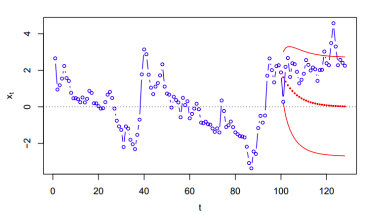


## 5.7 Miscellanea

**Example 5.7. (Prediction of an AR(p) Process).**

For an AR(p) process; i.e., $(\{X_t\})$ satisfies that

$$
X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} = W_t
$$

and $$(\mathrm{Cov}(W_t, X_s) = 0)$$ for $(s < t)$. With no difficulty, we can see that, when $(n \geq p)$,

$$
\hat{X}_{b_{n+1}} = P(X_{b_{n+1}} \mid X_n, \ldots, X_1)
= P(\phi_1 X_n + \cdots + \phi_p X_{n+1-p} + W_t \mid X_n, \ldots, X_1)
= \phi_1 X_n + \cdots + \phi_p X_{n+1-p}.
$$

The one-step prediction is fully determined by its previous $(p)$ observations. Further,

$$
E\{X_{n+1} - \hat{X}_{b_{n+1}}\}^2 = E W_t^2 = \sigma^2.
$$

Noting that, we can view that, conditional on $(\{X_n, \ldots, X_1\})$, 

$$
X_{n+1} = \phi_1 X_n + \cdots + \phi_p X_{n+1-p} + W_t
$$

follows a distribution with mean $(\phi_1 X_n + \cdots + \phi_p X_{n+1-p})$ and variance $(\sigma^2)$. Recall that the optimal predictor of $(X)$ given $(Y)$ is $(E(X \mid Y))$. Thus, in our AR(p) case, we have the optimal predictor being the same as the optimal linear predictor.

The other interesting thing is that, in this example, neither the Durbin-Levinson algorithm nor the Innovations algorithm is needed to compute $(\hat{X}_{b_{n+1}})$. Notice that, in both algorithms, we need the autocovariance or more generally the covariance function. For example, in the Durbin-Levinson algorithm, we have

$$
\hat{X}_{b_{n+1}} = \phi_{n1} X_n + \cdots + \phi_{nn} X_1, \quad n \geq 1,
$$

and its mean squared error of prediction will be denoted by $(\nu_n)$ as

$$
\nu_n = E(X_{n+1} - \hat{X}_{b_{n+1}})^2, \quad n \geq 1,
$$

where 

$$
\phi_{11} = \frac{\gamma_X(1)}{\gamma_X(0)}, \quad \nu_0 = \gamma_X(0),
$$

$$
\phi_{nn} = \frac{\gamma_X(n) - \sum_{j=1}^{n-1} \phi_{n-1,j} \gamma_X(n-j)}{\nu_{n-1}},
$$

$$
\begin{pmatrix}
\phi_{n1} \\
\vdots \\
\phi_{n,n-1}
\end{pmatrix}
=
\begin{pmatrix}
\phi_{n-1,1} \\
\vdots \\
\phi_{n-1,n-1}
\end{pmatrix}
-
\phi_{nn}
\begin{pmatrix}
\phi_{n-1,n-1} \\
\vdots \\
\phi_{n-1,1}
\end{pmatrix}
$$

and

$$
\nu_n = \nu_{n-1}(1 - \phi_{nn}^2).
$$


Thus, with the acknowledgement of $(\gamma_X(h))$, the coefficients $(\phi_n,j)$ are fully determined. Now we know $(\phi_{n,j})$ from the model definition directly. It does not make use of $(\gamma_X(h))$ of $(\{X_t\})$. Naturally, a question rises as: can we use the $(\phi)$ to find all the $(\gamma_X(h))$?


To do so, we look at the Step-Down Durbin-Levinson algorithm: given $(\phi_{n1}, \ldots, \phi_{nn})$ and $(\nu_n)$,

$$
\phi_{n-1,j} = \frac{\phi_{nj} + \phi_{nn} \phi_{n,n-j}}{1 - \phi_{nn}^2}
$$

$$
\nu_{n-1} = \frac{\nu_n}{1 - \phi_{nn}^2}
$$

Thus, start with $(\phi_{p,1} = \phi_1, \ldots, \phi_{p,p} = \phi_p)$ and $(\nu_p = \sigma^2)$, we can step down recursively to get

$$
\phi_{p-1,j} \text{ and } \nu_{p-1}, \quad \phi_{p-2,j} \text{ and } \nu_{p-2}, \quad \ldots, \quad \phi_{11} \text{ and } \nu_1.
$$

Then we can find all the $(\gamma_X(h))$ via

$$
\gamma_X(0) = \nu_0 = \frac{\nu_1}{1 - \phi_{11}^2}
$$

$$
\gamma_X(1) = \gamma_X(0) \phi_{11}
$$

and for $(n \geq 2)$,

$$
\gamma_X(n) = \nu_{n-1} \phi_{nn} + \sum_{j=1}^{n-1} \phi_{n-1,j} \gamma_X(n - j).
$$

Thus,

$$
\begin{aligned}
\gamma_X(2) &= \phi_{22} \nu_1 + \phi_{11} \gamma_X(1), \\
\gamma_X(3) &= \phi_{33} \nu_2 + \phi_{32} \gamma_X(2) + \phi_{22} \gamma_X(1), \\
&\vdots \\
\gamma_X(p) &= \phi_{pp} \nu_{p-1} + \phi_{p-1,1} \gamma_X(p-1) + \cdots + \phi_{p-1,p-1} \gamma_X(1).
\end{aligned}
$$

Noting that, once we have $(\gamma_X(0), \ldots, \gamma_X(p))$, for $(k \geq p + 1)$,

$$
\gamma_X(k) = \phi_1 \gamma_X(k - 1) + \cdots + \phi_p \gamma_X(k - p).
$$


**Example 5.8. (Generating a realization of an ARMA(p, q) process.)**

How to generate exact realizations of ARMA processes? Let us consider generating stationary and causal Gaussian AR(p) processes:

$$
Y_t - \phi_1 Y_{t-1} - \cdots - \phi_p Y_{t-p} = W_t, \quad W_t \sim N(0, \sigma^2).
$$

Recall that, for any $t \geq p + 1$, we have

$$
\hat{Y}_t = P(Y_t \mid Y_{t-1}, \ldots, Y_1) = \phi_1 Y_{t-1} + \cdots + \phi_p Y_{t-p}.
$$

The innovations are

$$
U_t = Y_t - \hat{Y}_t = Z_t,
$$

with mean squared error (MSE) being

$$
\nu_{t-1} = \mathrm{Var}(U_t) = \sigma^2.
$$

Now, we can use step-down Levinson-Durbin recursions to get coefficients for

$$
\hat{Y}_t = \phi_{t-1,1} Y_{t-1} + \cdots + \phi_{t-1,t-1} Y_1, \quad t = 2, 3, \ldots, p,
$$

and also the associated MSEs $\nu_{t-1}$.

Now we have all the innovations $U_t = Y_t - \hat{Y}_t$, for $t = 1, \ldots, p$, where

1. $E[U_t] = 0$ and $\mathrm{Var}(U_t) = \nu_{t-1}$.
2. $U_1, U_2, \ldots, U_p$ are uncorrelated random variables (by the Gaussian assumption, this means they are independent normals).

Thus, we can easily simulate $U_t$, $t = 1, \ldots, p$. Then we unroll $U_t$ to get simulations for $Y_t$ for $t = 1, \ldots, p$:

$$
\begin{aligned}
U_1 &= Y_1, \\
U_2 &= Y_2 - \phi_{11} Y_1, \\
U_3 &= Y_3 - \phi_{21} Y_2 - \phi_{22} Y_1, \\
&\vdots \\
U_p &= Y_p - \phi_{p-1,1} Y_{p-1} - \cdots - \phi_{p-1,p-1} Y_1.
\end{aligned}
$$

Now, we have $\{Y_t, t = 1, \ldots, p\}$, we can start generating $Y_t$ for $t > p$ based on the definition of the AR(p) model.

Once we know how to simulate the AR process $\phi(B) Y_t = Z_t$, we can easily simulate an ARMA process $\phi(B) X_t = \theta(B) Z_t$ based on

$$
X_t = \theta(B) Y_t.
$$
